## Objetivo:
Realizar un modelado completo para un problema de clasificación y un problema de regresión, comparando diferentes técnicas y procedimientos explicados durante el desarrollo de la materia.
## Instrucciones Generales:
1.	Cada grupo deberá **elegir un dataset de clasificación y otro de regresión** (cada grupo deberá trabajar con datasets distintos). Se les sugiere usar datasets de fuentes como Kaggle, UCI Machine Learning Repository o cualquier otro repositorio que consideren relevante.
2.	El objetivo es comparar distintos modelos y técnicas vistas en la materia. Deberán aplicar técnicas de preprocesamiento, selección de características, y validar el rendimiento de los modelos elegidos utilizando las métricas adecuadas.
3.	El trabajo se debe entregar en formato Jupyter Notebook, o cualquier otro que consideren conveniente, e incluir todas las etapas de un análisis de minería de datos, desde la exploración inicial hasta la evaluación del rendimiento de los modelos.


## Secciones del Trabajo Práctico
**1. Descripción del Problema:**
* Describir el problema de clasificación y regresión seleccionados.
* Comenzar efectuando un resumen del dataset y de sus características (para entenderlo antes de comenzar a trabajar con él).
* Justificar por qué los datasets son adecuados para aplicar los modelos vistos en la materia.
* Detallar el objetivo del análisis para cada dataset (ej. ¿Qué se espera predecir?).

**2. Análisis Exploratorio de Datos (EDA):**
* Realizar una exploración inicial de los datasets.
    * Estadísticas descriptivas: revisar los datos, dimensiones de los datos, tipos de datos, resumen (media, desviación estándar, mediana, etc.)
    * Distribución entre clases.    
    * Asimetría.
    * Visualización de distribuciones de variables (Histograma, Gráfico de Densidad o KDE).
    * Obtención de Matriz y Visualización de correlaciones entre variables.
    * Visualización de la matriz de dispersión (regresión) y matriz de dipersión por clase (clasificación).
    * Boxplots (regresión) y Boxplots por clase (clasificación).
* Identificar valores atípicos y valores faltantes. 
* Manejo de valores faltantes, limpiar los datos, eliminación de duplicados, corrección de inconsistencias de formato (si los hubiera), según sea necesario explicando el proceso.

**3. Preprocesamiento de Datos:**
* Dividir el dataset en entrenamiento y prueba (train/test split).
* Aplicar a lo sumo 1 técnica de transformación de datos (pueden ser de las vistas en clase u otras que consideren convenientes, pueden ser 2 o más también):
  * Escalamiento, estandarización o normalización.
  * Binarización.
  * Box-Cox o Yeo-Johnson.
  * Codificación de variables categóricas (para los atributos que lo requieran tanto en clasificación como en regresión, y para el atributo clase para problemas de clasificación, en caso de ser necesario). --> Usar Label Encoding, One-Hot Encoding o Target Encoding.
  * **En caso de aplicar 2 o más transformaciones al conjunto de datos es importante el orden en el que se aplican. ej: 1ro Box-Cox / 2do estandarización.**
* **Es importante que las transformaciones se ajusten solo con los datos de entrenamiento y luego se apliquen al conjunto de prueba.**
* Visualizar (el DF y también gráficamente) el antes y después de cada transformación aplicada.

#### --> Los siguientes puntos se agregarán en clases siguientes...

**Conclusiones:**
* Comparar los modelos y sacar conclusiones sobre cuál fue el más adecuado para cada tarea. 
* Expresar las limitaciones del análisis y posibles mejoras.
## Grupos:
* Serán 5 grupos de 4 integrantes y 1 grupo de 5 integrantes (la clase del 28 de Mayo deben presentar por grupos los datasets con los que trabajarán).
* Entrega del trabajo realizado: A determinar.

## Criterios de Evaluación: 

* Claridad en la explicación de los pasos y las técnicas aplicadas.
* Justificación de la elección de los modelos y técnicas.
* Precisión en los resultados obtenidos (métricas de evaluación).
* Calidad de las visualizaciones y del análisis de los resultados.
* Rigor en la comparación de los modelos.
* Creatividad en las conclusiones y en la presentación final.


El dataset de clasificación es el de entrenamiento (train.csv) de la competición de Kaggle (https://www.kaggle.com/competitions/titanic) en la que se propone predecir la columna Survived (que determina si un pasajero del Titanic sobrevivió o no al accidente de este transatlántico) basándose en un set de prueba (test.csv) de la competición para subir las predicciones a Kaggle y ver el accuracy del modelo entrenado en este set de prueba.  

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

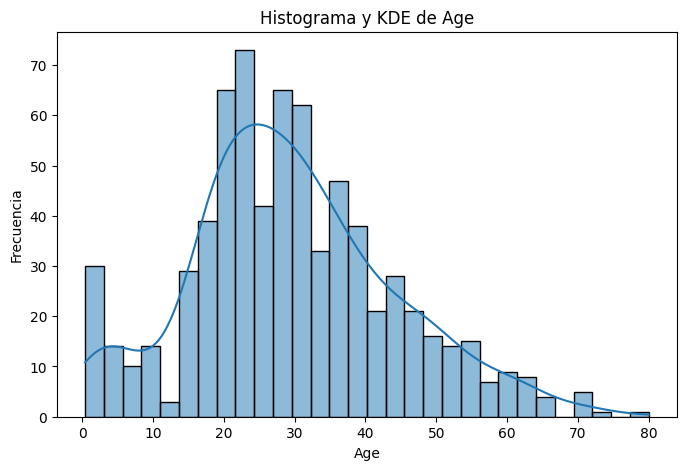

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Histograma y KDE de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()